### Average classroom time

In this chapter, we will delve into the anther metrics: Average classroom time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv("classroom_actions.csv")
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [10]:
df.shape

(3829, 5)

### 1. Hypothesis test

Set up the Null Hypothesis and Alternative Hypothesis for the calculation

$$H_0: u_{new} - u_{old} <= 0$$

$$H_1: u_{new} - u_{old} > 0$$

### 2. Average classroom time for control group

In [8]:
control_mean = df.query('group == "control"').total_days.mean()
control_mean

73.36899038461539

### 3. Average classroom time for experiment group

In [6]:
experiment_mean = df.query('group == "experiment"').total_days.mean()
experiment_mean

74.6715935334873

### 4. Observed difference between experiment and control group

In [9]:
obs_diff = experiment_mean - control_mean
obs_diff

1.3026031488719099

### 5. Bootstraping

Create **sampling distribution of difference** in average classroom times

In [12]:
diffs = []
for _ in range(10000):
    bootsamp = df.sample(3829, replace=True)
    control_mean = bootsamp.query('group == "control"').total_days.mean()
    experiment_mean = bootsamp.query('group == "experiment"').total_days.mean()
    diff = experiment_mean - control_mean
    diffs.append(diff)

In [19]:
diffs = np.array(diffs)

In [16]:
np.std(diffs)

0.733871965268511

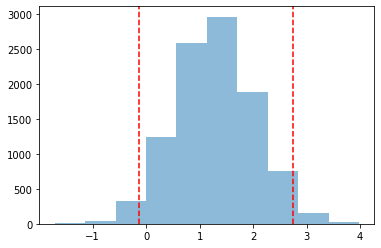

In [18]:
plt.hist(diffs, alpha=0.5)
plt.axvline(np.percentile(diffs, 2.5), ls='dashed', c='r')
plt.axvline(np.percentile(diffs, 97.5), ls='dashed', c='r')
plt.show()

### 6. Simulation of distribution under the null hypothesis

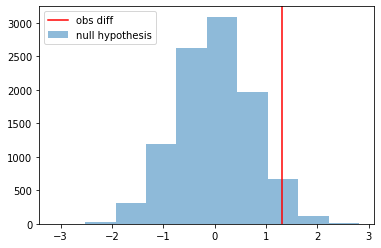

In [27]:
null_vals = np.random.normal(0, np.std(diffs), 10000)
plt.hist(null_vals, alpha=0.5)
plt.axvline(x=obs_diff, c='r')
plt.legend(['obs diff','null hypothesis'])
plt.show()

### 7. Calculate the p-value

In [24]:
(null_vals > obs_diff).mean()

0.0395

### 8. Conclusion

**Because the p-value = 3%, which is less than 5% percent threshold. We reject the null hypothesis. AS such the new feature will have positive impact on average classroom time**

However, For practically statistics, even if the increase in classroom time is statistically significant, engag